## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Tapas.


Data scientist

In [30]:
# Importing all required  libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Border styling using html and css 

In [38]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [39]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [45]:
#Shape and size of data 
data.shape

(25, 2)

In [41]:
data.isnull().sum() # there is no null value 

Hours     0
Scores    0
dtype: int64

In [42]:
data.columns# columns to take target variable and our feature variable , target is y = Scores

Index(['Hours', 'Scores'], dtype='object')

In [46]:
data.info() # checking information of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [44]:
data.describe()#checking wheather data is consistenti or not 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization 

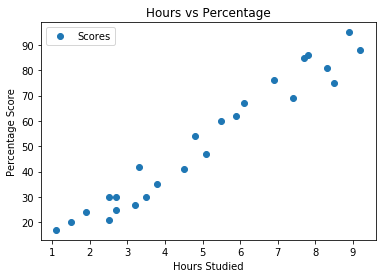

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

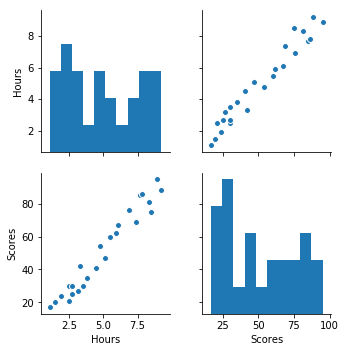

In [48]:
import seaborn as sns
sns.pairplot(data) # to visualization of relationship of existing data 

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [17]:
X = data.drop('Scores',axis=1)
y = data['Scores']

X1 = data.iloc[:, :-1].values  
y1 = data.iloc[:, 1].values  

### Data preparation train test split

In [49]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the model 

In [50]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

### Training the Algorithm

 We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [51]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


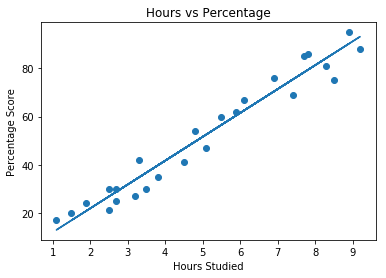

In [52]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [53]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211553


In [54]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [55]:
y_predict

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [56]:
y_predict[:5]

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217])

In [57]:
data1= pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
data1

,Actual,Predicted
5,20,39.678655
2,27,20.848407
19,69,79.321281
16,30,70.401690
11,62,12.919882


In [60]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a day', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [93.69173249]


In [61]:
# You can also write like this
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 914.5549752244242
Mean absolute Error: 25.126667098277874
